In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# esempio train

In [2]:
# Dati di esempio
X = np.array([[1], [2], [3], [4], [5]])  # Ore di studio (reshape per sklearn)
y = np.array([10, 12, 15, 20, 22])       # Voti
N = 6

# Crea e addestra il modello
model = LinearRegression()
model.fit(X, y)

# Coefficienti del modello
print("Intercetta (b0):", model.intercept_)
print("Coefficiente (b1):", model.coef_[0])

# Previsione
predizione = model.predict([[N]])  # Predici voto per 6 ore di studio
print("Voto previsto per", N,"ore di studio:", predizione[0])


Intercetta (b0): 6.199999999999999
Coefficiente (b1): 3.2000000000000006
Voto previsto per 6 ore di studio: 25.400000000000002


# Correlazione

Colonna 'CRIM': 1 correlazioni forti
RAD    0.625505
Name: CRIM, dtype: float64
----------------------------------------
Colonna 'ZN': 1 correlazioni forti
DIS    0.664408
Name: ZN, dtype: float64
----------------------------------------
Colonna 'INDUS': 4 correlazioni forti
NOX      0.763651
TAX      0.720760
AGE      0.644779
LSTAT    0.603800
Name: INDUS, dtype: float64
----------------------------------------
Colonna 'CHAS': 0 correlazioni forti
Colonna 'NOX': 4 correlazioni forti
INDUS    0.763651
AGE      0.731470
TAX      0.668023
RAD      0.611441
Name: NOX, dtype: float64
----------------------------------------
Colonna 'RM': 1 correlazioni forti
MEDV    0.69536
Name: RM, dtype: float64
----------------------------------------
Colonna 'AGE': 3 correlazioni forti
NOX      0.731470
INDUS    0.644779
LSTAT    0.602339
Name: AGE, dtype: float64
----------------------------------------
Colonna 'DIS': 1 correlazioni forti
ZN    0.664408
Name: DIS, dtype: float64
--------------------

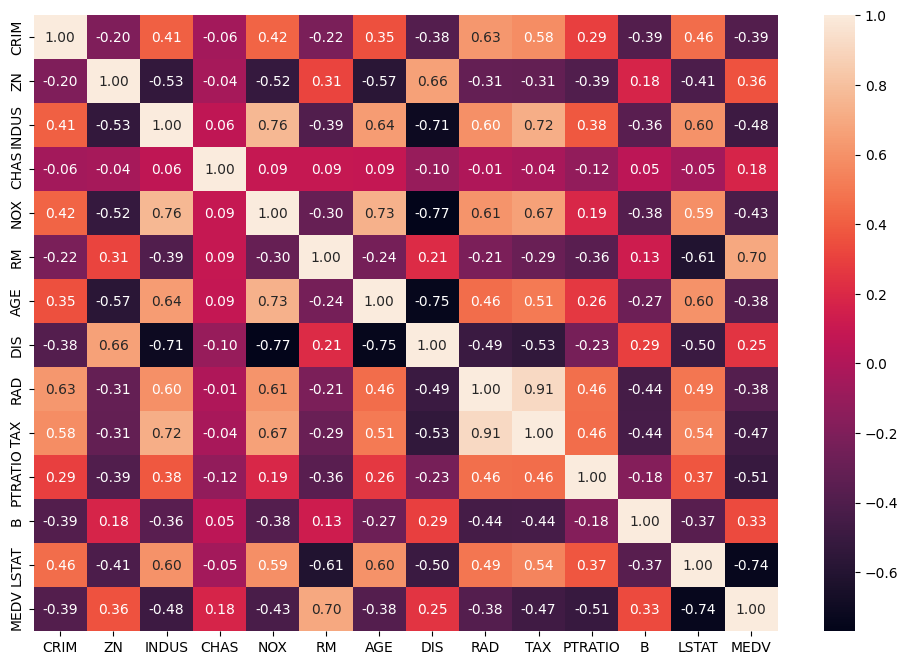

In [3]:
df = pd.read_csv("C:/Users/giann/Documents/GitHub/Bostonshouse/boston.csv")
plt.figure(figsize=(12, 8))         # Imposta le dimensioni della figura

corr = df.corr()                    # Pearson per tutte le coppie
corr_target = corr["TAX"].abs()     # Importanza assoluta rispetto al target
corr_target = corr_target.sort_values(ascending=False)
# print(corr_target[1:])              # Stampa le correlazioni più alte
# Stampa tutte le correlazioni con valore assoluto maggiore di 0.5 per ogni variabile
threshold = 0.6
for col in corr.columns:
    high_corr = corr[col][(corr[col] > threshold) & (corr[col] < 1)]
    high_corr = high_corr.reindex(high_corr.abs().sort_values(ascending=False).index)
    print(f"Colonna '{col}': {len(high_corr)} correlazioni forti")
    if not high_corr.empty:
        print(high_corr)
        print("-" * 40)

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [4]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop("TAX", axis=1)
y = df["TAX"]
selector = SelectKBest(score_func=f_regression, k=5)  
selector.fit(X, y)
scores = pd.Series(selector.scores_, index=X.columns)
scores.sort_values(ascending=False)


RAD        2435.038656
INDUS       544.896991
NOX         406.166226
CRIM        259.190294
LSTAT       211.836727
DIS         201.504027
AGE         173.872425
MEDV        141.761357
PTRATIO     135.906976
B           122.238121
ZN           55.347481
RM           46.995471
CHAS          0.639075
dtype: float64

In [5]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

model = Lasso(alpha=0.1)
model.fit(Xs, y)
importances = pd.Series(abs(model.coef_), index=X.columns)
importances.sort_values(ascending=False)


RAD        122.754988
INDUS       48.286884
ZN          19.944132
MEDV        15.542733
LSTAT        7.169877
CHAS         5.619249
NOX          5.058229
DIS          2.818437
AGE          2.606289
CRIM         2.156143
PTRATIO      1.904105
RM           0.749583
B            0.103353
dtype: float64

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


RAD        0.832779
INDUS      0.072279
NOX        0.036995
DIS        0.018707
CRIM       0.016444
PTRATIO    0.008274
ZN         0.004804
MEDV       0.002755
B          0.002672
LSTAT      0.001836
AGE        0.001445
RM         0.000845
CHAS       0.000165
dtype: float64

In [7]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rf, X, y, n_repeats=10, random_state=0)
perm_imp = pd.Series(res.importances_mean, index=X.columns)
perm_imp.sort_values(ascending=False)


RAD        1.411946
INDUS      0.085751
NOX        0.073283
DIS        0.027044
CRIM       0.009233
B          0.004694
PTRATIO    0.004441
ZN         0.003217
MEDV       0.002514
LSTAT      0.001356
AGE        0.000992
RM         0.000483
CHAS       0.000037
dtype: float64

C:\Users\giann\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


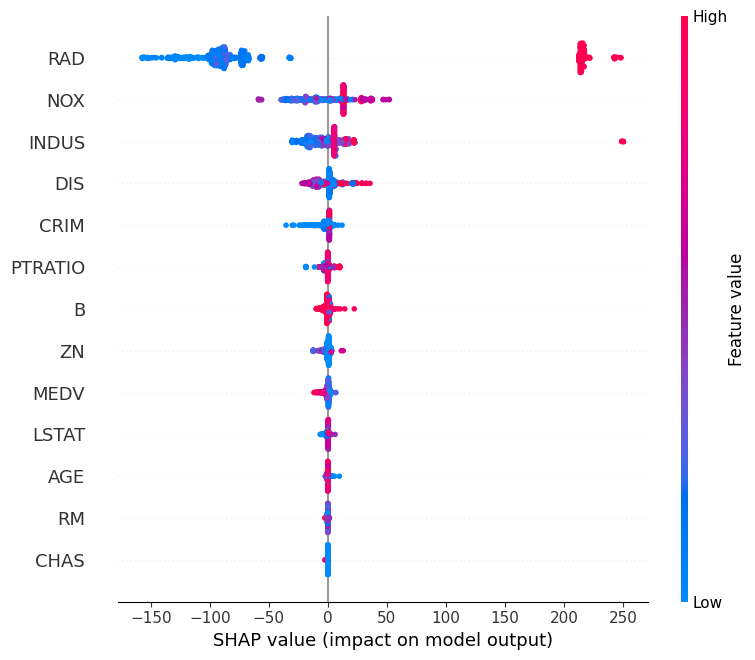

In [8]:
import shap

explainer = shap.Explainer(rf, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# y_true: valori reali
# y_pred: valori previsti dal modello
y_true = [18, 21, 25, 28, 30]
y_pred = [17.5, 20.5, 25.2, 27.8, 30.3]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

MSE: 0.13399999999999995
RMSE: 0.36606010435446246
MAE: 0.33999999999999986
R²: 0.9931069958847737
